# 1. Install and Import Dependencies

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib.pyplot

In [1]:
import tensorflow as tf
import os

# 2. Remove unfit images

In [2]:
import cv2
import imghdr

In [3]:
data_dir = '/content/sample_data/data' # define data directory

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png'] # required image extensions

In [5]:
# Loop through each class in the dataset directory
for image_class in os.listdir(data_dir):
    # Loop through each image in the current class directory
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Construct the full file path for the image
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Attempt to read the image using OpenCV
            img = cv2.imread(image_path)
            # Check the image's file extension/type using imghdr
            tip = imghdr.what(image_path)

            # If the image's extension/type is not in the list of valid extensions
            if tip not in image_exts:
                # Print a message indicating the image is invalid
                print('Image not in ext list {}'.format(image_path))
                # Remove the invalid image from the directory
                os.remove(image_path)
        except Exception as e:
            # If an exception occurs (e.g., corrupted image), print the issue
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


Image not in ext list /content/sample_data/data/cats/1X8A9422-4674x1559-1920x640.jpg
Image not in ext list /content/sample_data/data/cats/tapetum-lucidum-light-retina-night-vision-vertebrates.jpg
Image not in ext list /content/sample_data/data/cats/Collage-cats-cat-quiz-Mendel.jpg
Image not in ext list /content/sample_data/data/cats/Orange-colored-cat-yawns-displaying-teeth.jpg
Image not in ext list /content/sample_data/data/cats/Portrait-of-a-cat-with-whiskers-visible.jpg
Image not in ext list /content/sample_data/data/cats/800px-Juvenile_Ragdoll.jpg
Image not in ext list /content/sample_data/data/cats/michael-sum-LEpfefQf4rU-unsplash.jpg
Image not in ext list /content/sample_data/data/cats/two-different-breeds-of-cats-side-by-side-outdoors-in-the-garden.jpg
Image not in ext list /content/sample_data/data/cats/Molly_006-2829x1886-2726x1886-1920x1328.jpg
Image not in ext list /content/sample_data/data/cats/Scottish-fold-cat.jpg
Image not in ext list /content/sample_data/data/dogs/GD-Ho

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# Load images from the specified directory and its subdirectories
# 'data_dir' is the path to the folder where images are organized in subdirectories by class
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32)

# The function automatically:
# - Loads all the images from the 'data_dir'
# - Assigns labels based on the subdirectory names (each subdirectory represents a class)
# - Returns a 'tf.data.Dataset' object that can be used to efficiently handle the image data


Found 718 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator() #convert data to numpy iterator

In [9]:
# Retrieve the next batch of data (images and labels) from the dataset using the NumPy iterator
batch = data_iterator.next()

# The batch contains a tuple with two elements:
# - The first element is a batch of images (as NumPy arrays)
# - The second element is the corresponding labels for those images


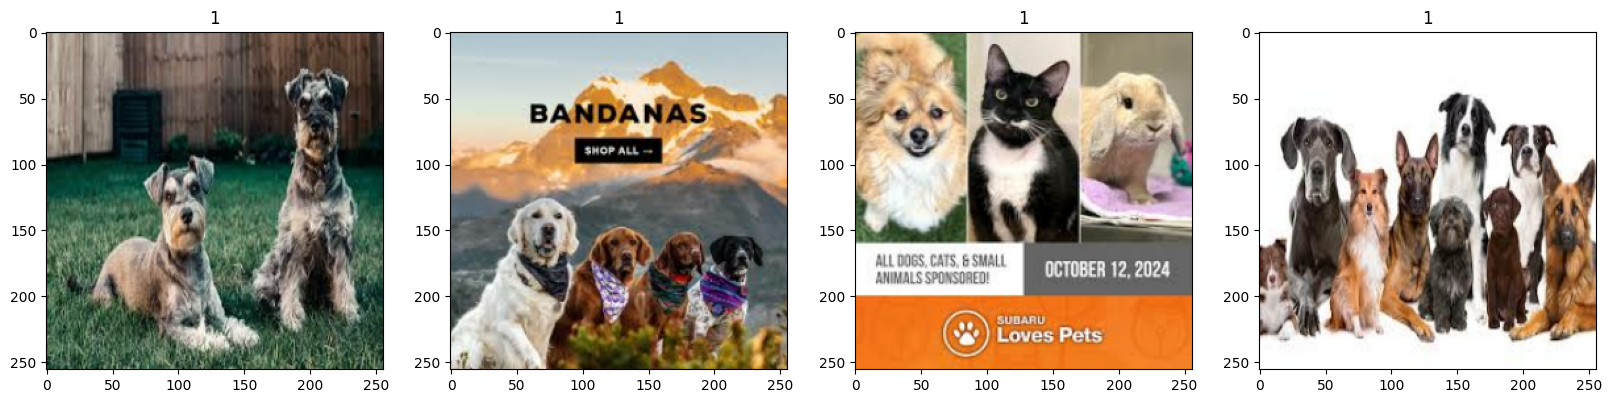

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
batch[0].shape

(32, 256, 256, 3)

In [11]:
import gc
gc.collect()


0

In [12]:
batch[0][8]

array([[[154.      , 139.      ,  84.      ],
        [153.77734 , 139.      ,  84.333984],
        [151.81445 , 138.81445 ,  86.81445 ],
        ...,
        [146.3711  , 149.81445 ,  76.55664 ],
        [144.22266 , 150.      ,  76.      ],
        [144.      , 150.      ,  76.      ]],

       [[152.85547 , 137.85547 ,  82.85547 ],
        [152.63281 , 137.85547 ,  83.12575 ],
        [150.77611 , 137.77611 ,  85.31002 ],
        ...,
        [146.47728 , 149.81445 ,  76.55664 ],
        [144.22266 , 150.      ,  76.      ],
        [145.10205 , 150.      ,  76.      ]],

       [[150.85156 , 136.42578 ,  81.42578 ],
        [150.69284 , 136.42578 ,  81.64844 ],
        [149.42578 , 136.42578 ,  83.61133 ],
        ...,
        [146.55664 , 149.34677 ,  76.3228  ],
        [144.4778  , 149.68092 ,  75.71289 ],
        [145.93643 , 149.43643 ,  75.71289 ]],

       ...,

       [[ 56.67364 ,  76.673645,  13.80077 ],
        [ 60.03283 ,  80.06479 ,  21.12658 ],
        [ 67.031784,  

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y)) # scale data to min 0, max 1

In [18]:
batch = data.as_numpy_iterator().next()
batch[0].shape

(32, 256, 256, 3)

# 5. Split Data

In [19]:
len(data)

23

In [22]:
train_size = int(len(data)* 0.7)
val_size = int(len(data)* 0.2)
test_size = int(len(data)* 0.1)+1

In [23]:
train_size, val_size, test_size

(16, 4, 3)

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [25]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# 6. Build Deep Learning Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
# Add a 2D Convolutional layer with 16 filters, a 3x3 kernel, stride of 1, and ReLU activation
# - input_shape: (256, 256, 3) specifies the shape of the input image (256x256 pixels with 3 channels for RGB)
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))

# Add a MaxPooling layer to reduce the spatial dimensions (downsampling)
# - Pooling reduces the size of the feature maps, helping to reduce computation and prevent overfitting
model.add(MaxPooling2D())

# Add another Conv2D layer with 32 filters, 3x3 kernel, stride of 1, and ReLU activation
# - This layer learns more complex features (such as edges and textures) from the downsampled feature maps
model.add(Conv2D(32, (3,3), 1, activation='relu'))

# Add another MaxPooling layer to further reduce the size of the feature maps
model.add(MaxPooling2D())

# Add another Conv2D layer with 16 filters, 3x3 kernel, stride of 1, and ReLU activation
# - This layer extracts more specific patterns from the features learned in the previous layers
model.add(Conv2D(16, (3,3), 1, activation='relu'))

# Add another MaxPooling layer to further reduce the spatial dimensions
model.add(MaxPooling2D())

# Flatten the 2D feature maps into a 1D vector to prepare for fully connected layers
# - This is required before passing the data to the Dense layers
model.add(Flatten())

# Add a Dense (fully connected) layer with 256 units and ReLU activation
# - This layer learns to combine the features extracted by the Conv2D layers
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Add the final output Dense layer with 1 unit and sigmoid activation
# - Sigmoid activation is used for binary classification (output is between 0 and 1)
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) # compile model

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # create a tensorboard callback to log metrics

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[early_stopping])


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5739 - loss: 0.9264 - val_accuracy: 0.5938 - val_loss: 0.6670
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5910 - loss: 0.6615 - val_accuracy: 0.6328 - val_loss: 0.6275
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5898 - loss: 0.6434 - val_accuracy: 0.6797 - val_loss: 0.5838
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6435 - loss: 0.6099 - val_accuracy: 0.7109 - val_loss: 0.5791
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7165 - loss: 0.5578 - val_accuracy: 0.6875 - val_loss: 0.4985
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7427 - loss: 0.5023 - val_accuracy: 0.7891 - val_loss: 0.4586
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8013 - loss: 0.4245 - val_accuracy: 0.9062 - val_loss: 0.3853
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8558 - loss: 0.3780 - val_accuracy: 0.8438 - val_loss:

# 8. Plot Performance

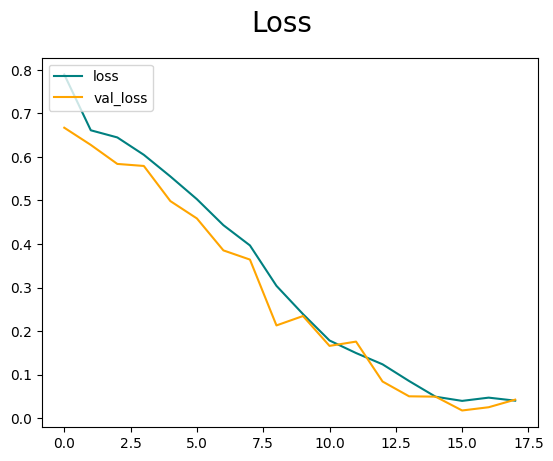

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

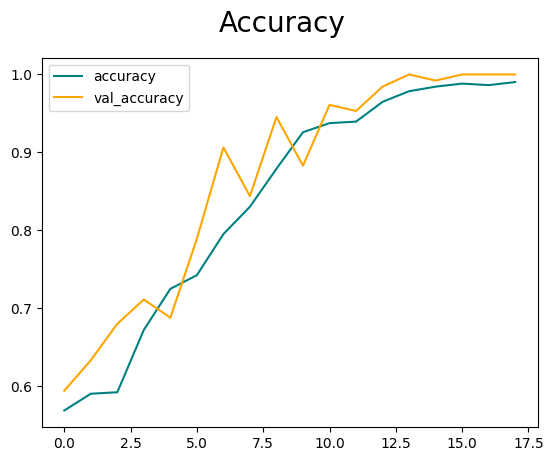

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


In [40]:
final_precision = precision.result().numpy()
final_recall = recall.result().numpy()
final_accuracy = accuracy.result().numpy()

# Print the accumulated metrics for the entire dataset
print(f'Precision: {final_precision}')
print(f'Recall: {final_recall}')
print(f'Accuracy: {final_accuracy}')

Precision: 1.0
Recall: 0.978723406791687
Accuracy: 0.9871794581413269


# 10. Make test prediction

In [41]:
import cv2

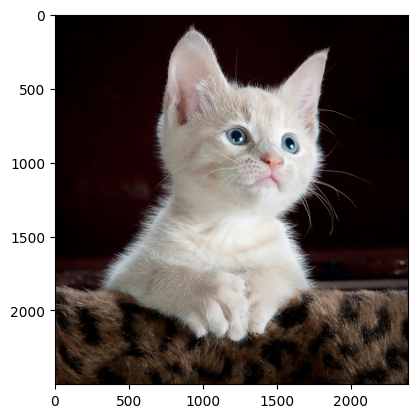

In [74]:
img = cv2.imread('/content/pexels-pixabay-45201.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert GBR to RGB format
plt.imshow(img)
plt.show()

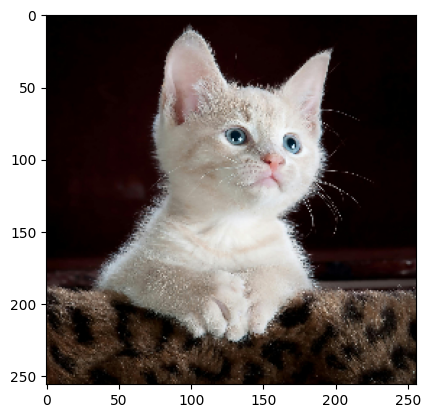

In [75]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [76]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[3.0200372e-05]], dtype=float32)

In [77]:
if yhat > 0.5:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat


# 11. Save the Model

In [51]:
from tensorflow.keras.models import load_model

In [54]:
model.save(os.path.join('models','classifier.keras'))

In [55]:
new_model = load_model('models/classifier.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [56]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [57]:
if yhat_new > 0.5:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat
